<a href="https://colab.research.google.com/github/zi-onion/ESAA/blob/main/04_08_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 03 앙상블 학습

### 앙상블 학습 개요

* 앙상블 학습
앙상블학습(Ensemble Learning):여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종
예측을 도출하는 기법

대부분의 정형 데이터 분류시 앙상블이 뛰어난 성능을 나타냄.

앙상블 알고리즘의 대표적인 방법에는 랜덤 포레스트와 그래디언트 부스팅 알고리즘이 존재.


* 앙상블 학습의 유형
전통적으로 보팅(Voting), 배깅(Bagging), 부스팅(Boosting) 의 세가지로 나뉨.

보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식.
 * 보팅: 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것
 * 배깅: 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행
  * 부트스트래핑(Bootstrapping) 분할 방식:
  개별분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데, 이때, 개별 Classifier에게 데이터를 샘플링 해서 추출하는 방식

 대표적인 예시: 랜덤 포레스트 알고리즘

 * 부스팅: 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행하는 것.

 대표적인 모듈: 그래디언트 부스트, XGBoost(extraGradien Boost), LightGBM(Light Gradient Boost)


### 보팅 유형 - 하드보팅과 소피트보팅

* 하드보팅: 다수결 원칙과 유사, 예측한 결값값들중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것
* 소프트보팅: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선ㅌ정하는 것(예측성능이 좋아서 일반적으로 사용됨)



### 보팅 분류기(Voting classifier)

사이킷런에서 보팅방식의 앙상블을 구현한 Voting classifier 클래스 제공함.



In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [9]:
#개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators = [('LR',lr_clf),('KNN',knn_clf)], voting = 'soft') #votin기본은 'hard'

X_train, X_test, y_train, y_test = train_test_split(cancer.data , cancer.target, test_size = 0.2,random_state = 156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

#개별 모델의 학습/예측/평가:
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train,y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))


Voting 분류기 정확도: 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


여러개의 기반 분류기를 결합한다고해서 무조건 기반 분류기보다 예측 성능이 향상되는 것은 아니나, 보팅, 배깅, 부스팅 등의 앙상블 방법은 단일보다 뛰어난 예측성능을 가지는 경우가 많음.

ML 모델의 성능은 다양한 테스트 데이터에 의해 검증되므로 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 ML모델의 평가요소가 됨.(편향- 분산트레이드오
프가 중요)



## 04 랜덤 포레스트
### 랜덤 포레스트의 개요 및 실습

랜덤포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측을 결정함.

특징
1. 앙살블 알고리즘 중 비교적 빠른 수행 속도
2. 다양한 영역에서의 높은 예측 성능.
3. 쉽고 직관적인 결정 트리

* 부트스트래핑(bootstrapping) 분할 방식: 여러개의데이터세
트를중첩되게분리하는것
* 랜덤포레스트의 서브세트( Subser) 데이터 : 부트스트래핑으로 데이터가 임의로 만들어진 데이터. 데이터 건수는 전체 데이터 건수와 동일하지만, 개별 데이터가 중첩되어 만들어짐.

각 서브세트에 결정 트리 분류기를 각각 적용하는 것이 랜덤 포레스트.

사이킷런은 RandomForesiClassifer 클래스를 통해 랜덤 포레스트 기반의 분류를 지원함.



In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#중복된 피처명에 대해 새로운 피처명 부과
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
  return new_feature_name_df

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
  feature_name_df = pd.read_csv('/content/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  # 학습 피처 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명을 feature_name 적용
  X_train = pd.read_csv('/content/X_train.txt', sep='\s+', names = feature_name)
  X_test = pd.read_csv('/content/X_test.txt', sep='\s+',names = feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/y_train.txt', sep='\s+', header = None, names = ['action'])
  y_test = pd.read_csv('/content/y_test.txt', sep='\s+',header = None, names = ['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train,y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 에측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

하이퍼 파리미터의 종류
* n_estimators
* max_features
* max_depth
* min_samples_leaf
등


In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
}
#RandomForestClassifier 객체 생성 후 GirdSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params,cv = 2,n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [13]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_leaf = 8, min_samples_split = 8, random_state = 0)
rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9165


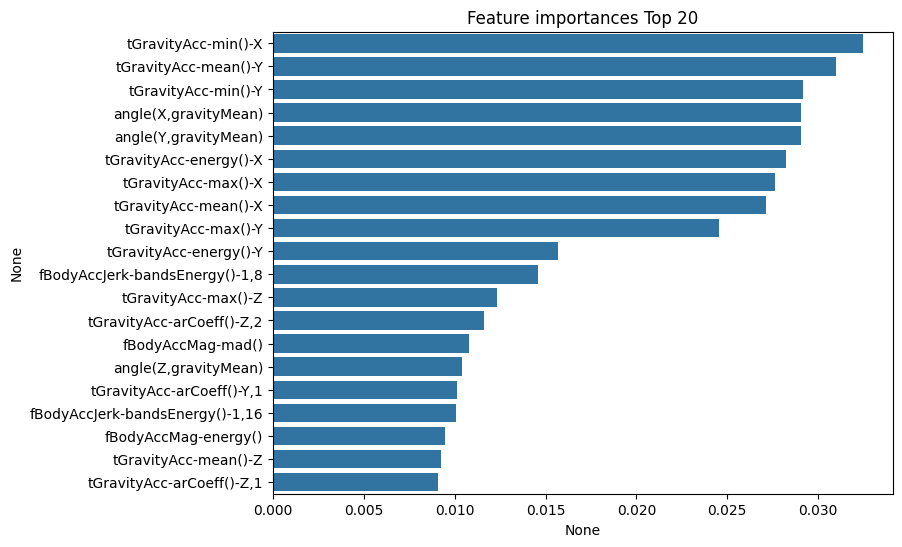

In [14]:
#막대그래프로 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 05 GBM(Gradient Boosting Machine)

### GBM 개요 및 실습
부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

대표적인 구현은 (adaptive boosting)와 그래디언트 부스팅.

둘은 유사하나, GBM은 가중치 업데이트를 경사 하강법 (GradientDescent)을 이용하는 것이 큰 차이이다.

사이킷런은 GBM기반의 분류를 위해서 GradientBoostingClassifier 클래스를 제공함.


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test,y_train,y_test = get_human_dataset()

#GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행시간: {0: .1f}초'.format(time.time() - start_time))


GBM 정확도: 0.9386
GBM 수행시간:  980.1초


일반적으로 GBM이 랜덤포레스트보다는 예측 성능이 조금 뛰어난 경우가 많으나 수행시간이 오래 걸린다는 단점이 존재함.

### GBM 하이퍼 파라미터 및 튜닝

하이퍼파라미터 종류
* loss
* learning_rate
* n_estimator
* subsample

등

In [ ]:
#GridsearchCV를 이용해 하이퍼파라미터를 최적화

from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [100,500],
    'learning_rate' : [0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid = params,cv=2, verbose=1)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [ ]:
#GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
ab_accuracy = accuracy_score(y_test,gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM은 과적합에도 강한 뛰어난 예측 성능을 가짐. 하지만 수행 시간이 오래 걸린다는 단점을 지님.

## 06 XGBoost(eXtra Gradient Boost)

### XGBoost 개요
XGBoost는 GBM에 기반하지만, GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제를 해결해서 매우 각광을 받음.

초기의 독자적인 XGBoost 프레임 워크 기반의 XGBoost 를 파이썬 래퍼 XGBooSt 모듈, 사이킷런과 연동되는 모듈을 사이킷런 래퍼 XGBost모듈이라고 지칭.

In [18]:
import xgboost as xgb
from xgboost import XGBClassifier

### 파이썬 래퍼 XGBoost 하이퍼 파라미터

* 일반 파라미터
 * booster
 * silent
 * nthread
* 부스터 파라미터(대부분의 파라미터)
 * eta[default=0.3,alias:learning_rate]
 * num_boost_rounds
 * min_child_weight[default=1]
 * gamma[default=0, alias: min_split_loss]
 * max_depth[defaul=6]
 * sub_sample[default=1]
 * colsample_bytree[defaut=1]
 * lambda[default=1,alias:reg_lambda]
 * alpha[default=0,alias:reg_alpha]
 * scale_pos_weight[default=1]
* 학습 태스크 파라미터
 * objective
 * binary:logistic
 * multi:softmax
 * eval_metric


In [19]:
import xgboost
print(xgboost.__version__)

2.0.3


### 파이썬 래퍼 XGBoost 적용- 위스콘신 유방암 예측

In [20]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features,columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [21]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

#전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train,X_test,y_train,y_test = train_test_split(X_features,y_label,test_size=0.2,random_state =156)
print(X_train.shape,X_test.shape)


['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64
(455, 30) (114, 30)


In [22]:
dtrain = xgb.DMatrix(data = X_train,label = y_train)
dtest = xgb.DMatrix(data = X_test, label=y_test)

In [23]:
params = {'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_matric': 'logloss',
    'early_stoppings': 100
}
num_rounds = 400

In [24]:
#train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명가합니다
wlist = [(dtrain,'train'),(dtest,'eval')]
#하이퍼 파라미터와 early stoppings 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params,dtrain = dtrain, num_boost_round = num_rounds,early_stopping_rounds=1100,evals=wlist)

[0]	train-logloss:0.58431	eval-logloss:0.56554
[1]	train-logloss:0.51885	eval-logloss:0.50669
[2]	train-logloss:0.46457	eval-logloss:0.45868
[3]	train-logloss:0.41713	eval-logloss:0.41822
[4]	train-logloss:0.37585	eval-logloss:0.38103
[5]	train-logloss:0.34075	eval-logloss:0.35137
[6]	train-logloss:0.31028	eval-logloss:0.32588
[7]	train-logloss:0.28283	eval-logloss:0.30127
[8]	train-logloss:0.25925	eval-logloss:0.28197
[9]	train-logloss:0.23822	eval-logloss:0.26265
[10]	train-logloss:0.21951	eval-logloss:0.24821
[11]	train-logloss:0.20251	eval-logloss:0.23231
[12]	train-logloss:0.18759	eval-logloss:0.22079
[13]	train-logloss:0.17386	eval-logloss:0.20795
[14]	train-logloss:0.16199	eval-logloss:0.19764
[15]	train-logloss:0.15109	eval-logloss:0.18950
[16]	train-logloss:0.14056	eval-logloss:0.18052
[17]	train-logloss:0.13137	eval-logloss:0.17246
[18]	train-logloss:0.12329	eval-logloss:0.16512
[19]	train-logloss:0.11565	eval-logloss:0.15828
[20]	train-logloss:0.10860	eval-logloss:0.15436
[2

In [25]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 에측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

predict() 수행 결괏값을 10개만 표시, 에측 확률값으로 표시됨
[0.944 0.005 0.881 0.156 0.994 1.    1.    1.    0.997 0.   ]


In [26]:
#예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

예측값 10개만 표시:  [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix,precision_recall_curve,roc_curve

def get_clf_eval(y_test,pred=None,pred_proba=None):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test,pred)
  precision = precision_score(y_test,pred)
  recall = recall_score(y_test,pred)
  f1 = f1_score(y_test,pred)
  roc_auc = roc_auc_score(y_test,pred_proba)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율 : {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision,recall,f1,roc_auc))


get_clf_eval(y_test,preds,pred_probs)


오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율 : 0.9870, F1: 0.9806, AUC:0.9947


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

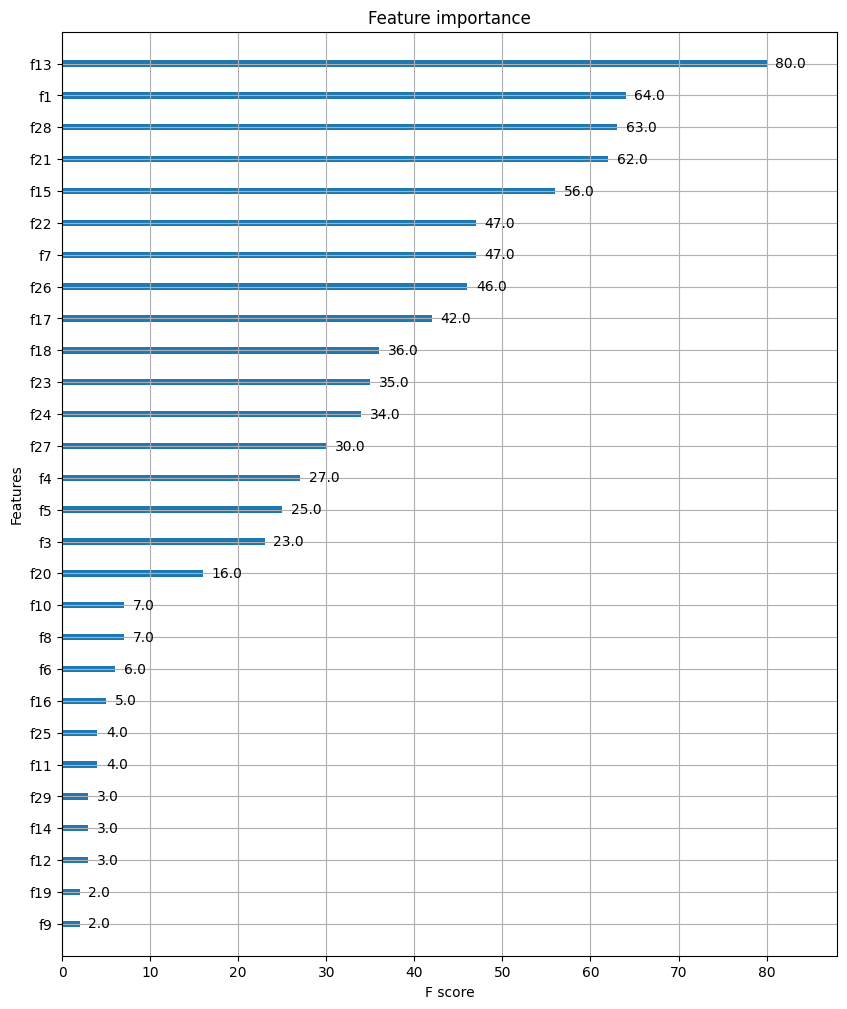

In [28]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

In [29]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learing_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [30]:
get_clf_eval(y_test,w_preds,w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율 : 0.9870, F1: 0.9806, AUC:0.9961


In [31]:
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate = 0.1,max_depth=3)
evals = [(X_test,y_test)]
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=evals,verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.56554
[1]	validation_0-logloss:0.50669
[2]	validation_0-logloss:0.45868
[3]	validation_0-logloss:0.41822
[4]	validation_0-logloss:0.38103
[5]	validation_0-logloss:0.35137
[6]	validation_0-logloss:0.32588
[7]	validation_0-logloss:0.30127
[8]	validation_0-logloss:0.28197
[9]	validation_0-logloss:0.26265
[10]	validation_0-logloss:0.24821
[11]	validation_0-logloss:0.23231
[12]	validation_0-logloss:0.22079
[13]	validation_0-logloss:0.20795
[14]	validation_0-logloss:0.19764
[15]	validation_0-logloss:0.18950
[16]	validation_0-logloss:0.18052
[17]	validation_0-logloss:0.17246
[18]	validation_0-logloss:0.16512
[19]	validation_0-logloss:0.15828
[20]	validation_0-logloss:0.15436
[21]	validation_0-logloss:0.14633
[22]	validation_0-logloss:0.13936
[23]	validation_0-logloss:0.13393
[24]	validation_0-logloss:0.13015
[25]	validation_0-logloss:0.12489
[26]	validation_0-logloss:0.12206
[27]	validation_0-logloss:0.11890
[28]	validation_0-logloss:0.11637
[29]	validation_0-loglos